# Table of Contents
 <p>

This notebook shows how the PCA rotation is done and makes the figure for the paper.

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import numpy as np
from pathlib import Path
import pickle
from scipy.interpolate import interp1d

In [2]:
plt.rcParams.update({'font.family': 'cmr10',
                     'font.size': 12,
                     'axes.unicode_minus': False,
                     'axes.labelsize': 13,
                     'figure.figsize': (4, 4),
                     'figure.dpi': 80,
                     'mathtext.fontset': 'cm',
                     'mathtext.rm': 'serif',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'xtick.top': True,
                     'ytick.right': True
                     })

In [3]:
X = np.load('../data/interim/train_X_2p.npy')
y = np.load('../data/interim/train_Y_2p.npy')
mass = np.load('../data/interim/train_jetmass_2p.npy')
print(X.shape)
print(y.shape)
print(mass.shape)

(237452, 11)
(237452, 1)
(237452,)


In [4]:
cols = [#r'$p_T$',
    r'$\tau_{1}^{1/2}$', r'$\tau_{1}^{1}$', r'$\tau_{1}^{2}$',
    r'$\tau_{2}^{1/2}$', r'$\tau_{2}^{1}$', r'$\tau_{2}^{2}$',
    r'$\tau_{3}^{1/2}$', r'$\tau_{3}^{1}$', r'$\tau_{3}^{2}$',
    r'$\tau_{4}^{1}$', r'$\tau_{4}^{2}$'
]

In [5]:
QCD = X[y.ravel() == 0]
QCD_mass = mass[y.ravel() == 0]

In [6]:
nbins = 20
events_per_bin = len(QCD_mass) // nbins
print(events_per_bin)
init_bin_edges = np.sort(QCD_mass)[::events_per_bin]
print(init_bin_edges)

5301
[ 50.0002  55.3805  61.6572  68.5385  76.3294  85.0726  94.996  105.86
 117.719  130.366  144.055  158.259  173.164  188.362  204.794  222.627
 242.135  265.083  292.699  330.316  399.92  ]


In [7]:
bins = [50]
for i, b in enumerate(init_bin_edges[1:-1]):
    bins.append(b)
bins.append(400)
print(bins)

[50, 55.3805, 61.6572, 68.5385, 76.3294, 85.0726, 94.99600000000001, 105.86, 117.719, 130.366, 144.055, 158.259, 173.16400000000002, 188.362, 204.794, 222.627, 242.135, 265.08299999999997, 292.699, 330.316, 400]


In [8]:
QCD_bin_label = np.digitize(QCD_mass, bins=bins)

In [9]:
low_mass = QCD[QCD_bin_label==1]
mid_mass = QCD[QCD_bin_label==7]
high_mass = QCD[QCD_bin_label==15]

In [10]:
low_mass.shape

(5301, 11)

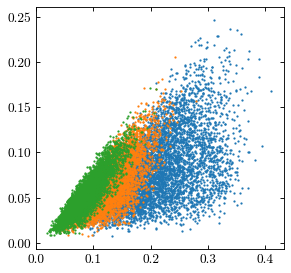

In [11]:
s=1
alp = 1


plt.scatter(x=high_mass[:, 1],
            y=high_mass[:, 4],
            s=s,
            alpha=alp
            )
plt.scatter(x=mid_mass[:, 1],
            y=mid_mass[:, 4],
            s=s,
            alpha=alp
            )
plt.scatter(x=low_mass[:, 1],
            y=low_mass[:, 4],
            s=s,
            alpha=alp
            )

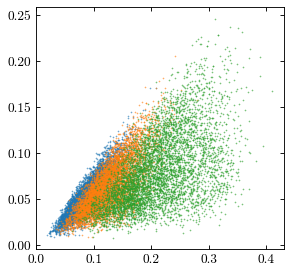

In [12]:
s=0.1
alp = 1

plt.scatter(x=low_mass[:, 1],
            y=low_mass[:, 4],
            s=s,
            alpha=alp
            )
plt.scatter(x=mid_mass[:, 1],
            y=mid_mass[:, 4],
            s=s,
            alpha=alp
            )
plt.scatter(x=high_mass[:, 1],
            y=high_mass[:, 4],
            s=s,
            alpha=alp
            )

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
SS_low = StandardScaler()
SS_mid = StandardScaler()
SS_high = StandardScaler()

In [15]:
x_low_scaled = SS_low.fit_transform(low_mass)
x_mid_scaled = SS_mid.fit_transform(mid_mass)
x_high_scaled = SS_high.fit_transform(high_mass)

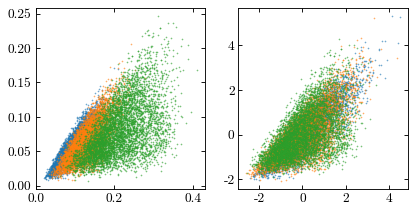

In [16]:
s=0.1

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.scatter(x=low_mass[:, 1],
            y=low_mass[:, 4],
            s=s,
            alpha=alp
            )
plt.scatter(x=mid_mass[:, 1],
            y=mid_mass[:, 4],
            s=s,
            alpha=alp
            )
plt.scatter(x=high_mass[:, 1],
            y=high_mass[:, 4],
            s=s,
            alpha=alp
            )

plt.subplot(1, 2, 2)
plt.scatter(x=x_low_scaled[:, 1],
            y=x_low_scaled[:, 4],
            s=s,
            alpha=alp
            )
plt.scatter(x=x_mid_scaled[:, 1],
            y=x_mid_scaled[:, 4],
            s=s,
            alpha=alp
            )
plt.scatter(x=x_high_scaled[:, 1],
            y=x_high_scaled[:, 4],
            s=s,
            alpha=alp
            )

plt.show()

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca_low = PCA().fit(x_low_scaled)
pca_mid = PCA().fit(x_mid_scaled)
pca_high = PCA().fit(x_high_scaled)

In [19]:
pca_low_data = pca_low.transform(x_low_scaled)
pca_mid_data = pca_mid.transform(x_mid_scaled)
pca_high_data = pca_high.transform(x_high_scaled)

In [20]:
# Scale again
SS_pca_low = StandardScaler().fit(pca_low_data)
SS_pca_mid = StandardScaler().fit(pca_mid_data)
SS_pca_high = StandardScaler().fit(pca_high_data)

In [21]:
low_scaled_and_pcad_data = pca_low.inverse_transform(SS_pca_low.transform(pca_low_data))

In [22]:
mid_scaled_and_pcad_data = pca_mid.inverse_transform(SS_pca_mid.transform(pca_mid_data))

In [23]:
high_scaled_and_pcad_data = pca_high.inverse_transform(SS_pca_high.transform(pca_high_data))

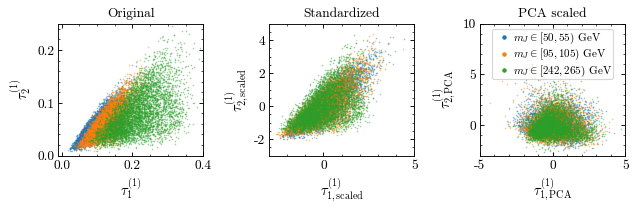

In [29]:
s=0.05
alp=1
rast=True

plt.figure(figsize=(8.2, 2.8))

# ************************************
plt.subplot(1, 3, 1)
plt.scatter(x=low_mass[:, 1],
            y=low_mass[:, 4],
            s=s,
            alpha=alp,
            rasterized=rast
            )
plt.scatter(x=mid_mass[:, 1],
            y=mid_mass[:, 4],
            s=s,
            alpha=alp,
            rasterized=rast
            )
plt.scatter(x=high_mass[:, 1],
            y=high_mass[:, 4],
            s=s,
            alpha=alp,
            rasterized=rast
            )
plt.xlabel(r'$\tau_1^{(1)}$')
plt.ylabel(r'$\tau_2^{(1)}$')
plt.xlim(-0.01, 0.4)
plt.ylim(0, 0.25)
# plt.text(0.2, 0.24, 'Original', ha='center', va='top')
plt.title('Original', fontsize=12)
plt.minorticks_on()

# ************************************
plt.subplot(1, 3, 2)
plt.scatter(x=x_low_scaled[:, 1],
            y=x_low_scaled[:, 4],
            s=s,
            alpha=alp,
            rasterized=rast
            )
plt.scatter(x=x_mid_scaled[:, 1],
            y=x_mid_scaled[:, 4],
            s=s,
            alpha=alp,
            rasterized=rast
            )
plt.scatter(x=x_high_scaled[:, 1],
            y=x_high_scaled[:, 4],
            s=s,
            alpha=alp,
            rasterized=rast
            )
plt.xlabel(r'$\tau_{1,\rm{scaled}}^{(1)}$')
plt.ylabel(r'$\tau_{2,\rm{scaled}}^{(1)}$')
plt.xlim(-3, 5)
plt.ylim(-3, 5)
# plt.text(1, 4.68, 'Standardized', ha='center', va='top')
plt.title('Standardized', fontsize=12)
plt.minorticks_on()

# ************************************
plt.subplot(1, 3, 3)
plt.scatter(x=low_scaled_and_pcad_data[:, 1],
            y=low_scaled_and_pcad_data[:, 4],
            s=s,
            alpha=alp,
            rasterized=rast
            )
plt.scatter(x=mid_scaled_and_pcad_data[:, 1],
            y=mid_scaled_and_pcad_data[:, 4],
            s=s,
            alpha=alp,
            rasterized=rast
            )
plt.scatter(x=high_scaled_and_pcad_data[:, 1],
            y=high_scaled_and_pcad_data[:, 4],
            s=s,
            alpha=alp,
            rasterized=rast
            )
plt.scatter([],[], s=9, color='C0',
#             label=r'$50\,\rm{GeV} < m_J < 55\,\rm{GeV}$'
            label=r'$m_J \in [50, 55)$ GeV'
           )
plt.scatter([],[], s=9, color='C1',
#             label=r'$95\,\rm{GeV} < m_J < 105\,\rm{GeV}$'
            label=r'$m_J \in [95, 105)$ GeV'
           )
plt.scatter([],[], s=9, color='C2',
#             label=r'$242\,\rm{GeV} < m_J < 265\,\rm{GeV}$'
            label=r'$m_J \in [242, 265)$ GeV'
           )
plt.xlabel(r'$\tau_{1,\rm{PCA}}^{(1)}$')
plt.ylabel(r'$\tau_{2,\rm{PCA}}^{(1)}$')
plt.xlim(-5, 5)
plt.ylim(-3, 10)
# plt.text(0, 6.6, 'PCA', ha='center', va='top')
plt.title('PCA scaled', fontsize=12)
plt.minorticks_on()

plt.legend(loc='upper center',
           fontsize=10,
           labelspacing=0.1,
           borderpad=0.1,
           handletextpad=-0.25,
           frameon=True
          )
# ************************************
plt.tight_layout(w_pad=0.3)
plt.savefig('../reports/figures/PCA_scatter.pdf', bbox_inches='tight')
plt.show()